In [404]:
# Load Libraries
import numpy as np
import matplotlib.pyplot as plt

In [405]:
# Uses FTCS to solve the heat equation. This is the algorithm from Chapter 2
def update(u,r):
    # Initialize and preserve the boundary conditions
    res = np.empty_like(u)
    res[0] = u[0]
    res[-1] = u[-1]
    # Loop through non-boundary values
    stop = len(u)-1
    for k in range(1,stop):
        res[k] = u[k] + r*(u[k+1]-2*u[k]+u[k-1])
    return res

In [406]:
# Air Fluid Properties
alpha = 1.0e-5
# Create mesh in [-0.1,0.1]
x = np.linspace(-1,1,21,endpoint=True)
dx = x[1] - x[0]
# Initial solution is a parabola
u0 = x**3+1

In [407]:
# Test moderate dt for 100000 seconds
dt = 400
rM = alpha*dt/dx**2
print(rM)
Nt = int(20000.0/dt)
print( Nt)
uM = u0
for k in range(Nt):
    uM = update(uM,rM)

0.4000000000000002
50


In [408]:
# Test large dt for 100000 seconds
dt = 600
rL = alpha*dt/dx**2
print(rL)
Nt = int(20000.0/dt)
print( Nt)
uL = u0
for k in range(Nt):
    uL = update(uL,rL)

0.6000000000000003
33


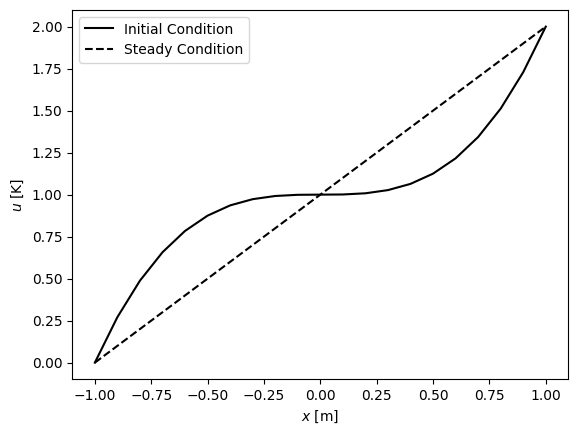

In [409]:
plt.plot(x,u0,'-k',label='Initial Condition')
plt.plot(x,x+1,'--k',label='Steady Condition')
plt.xlabel(r'$x$ [m]')
plt.ylabel(r'$u$ [K]')
plt.legend()
plt.show()

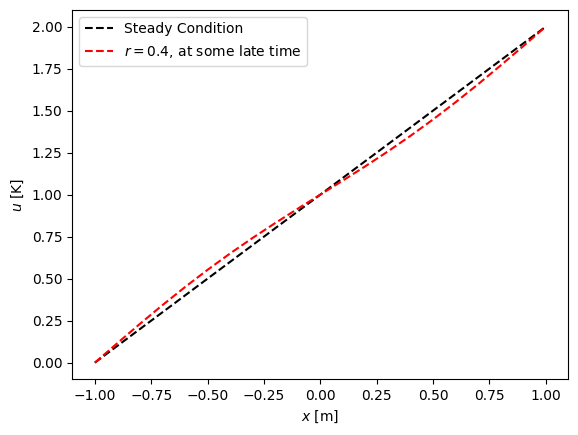

In [410]:
plt.plot(x,x+1,'--k',label='Steady Condition')
plt.plot(x,uM,'--r',label='$r=0.4$, at some late time')
plt.xlabel(r'$x$ [m]')
plt.ylabel(r'$u$ [K]')
plt.legend()
plt.show()

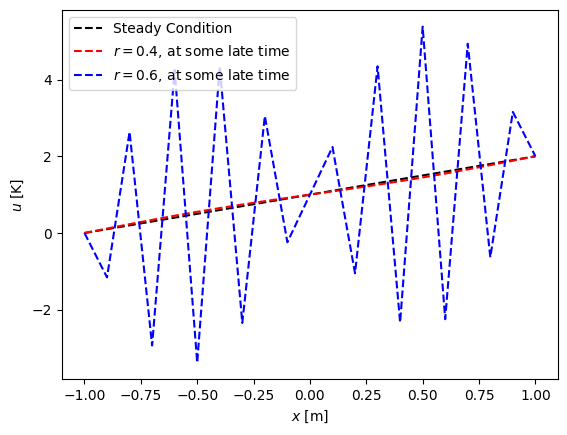

In [411]:
plt.plot(x,x+1,'--k',label='Steady Condition')
plt.plot(x,uM,'--r',label='$r=0.4$, at some late time')
plt.plot(x,uL,'--b',label='$r=0.6$, at some late time')
plt.xlabel(r'$x$ [m]')
plt.ylabel(r'$u$ [K]')
plt.legend()
plt.show()